# Chapter 3 - Boston House Pricing Regression

In [1]:
import random
import numpy as np
from keras import Sequential
from keras.layers import Dense
from keras.datasets import boston_housing
from matplotlib import pyplot as plt
from keras.utils.vis_utils import plot_model

## Loading the Dataset

In [2]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

## Normalizing the Data

In [3]:
def normalize(data):
  mean = data.mean(axis = 0)
  std = train_labels.std(axis = 0)

  data /= std
  data -= mean

  return data

## building the Model

In [4]:
def build_model(dim):
  model = Sequential()

  # Add layers
  model.add(Dense(units = 64, activation = 'relu', input_shape = (dim, )))
  model.add(Dense(units = 64, activation = 'relu'))
  model.add(Dense(units = 1))

  # Compile model
  model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])

  return model

In [43]:
def train_model(model, x_train, y_train, epochs, batch_size, validation_data):
  history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, verbose = 0, validation_data = validation_data)
  return history

## Evaluating the Model

In [6]:
def evaluate_model(model, x_test, y_test):
  results = model.evaluate(x_test, y_test, verbose = 0)
  return results

## Manual K-Means Cross Validation

In [41]:
def k_means_validation(k, train_data, epochs):

  num_samples = len(train_data) // k

  history_mae = []

  for i in range(k):
    print(f'Processing Fold #{i}...')

    # Validation split
    val_data = train_data[i * num_samples: (i + 1) * num_samples]
    val_labels = train_labels[i * num_samples: (i + 1) * num_samples]

    # Remaining training data
    partial_train_data = np.concatenate([train_data[: i * num_samples], train_data[(i + 1) * num_samples:]], axis = 0)
    partial_train_labels = np.concatenate([train_labels[: i * num_samples], train_labels[(i + 1) * num_samples:]], axis = 0)

    # Build the model
    model = build_model(dim = train_data.shape[1])

    # Train the model
    history = train_model(
      model = model,
      x_train = partial_train_data,
      y_train = partial_train_labels,
      validation_data = (val_data, val_labels),
      epochs = epochs,
      batch_size = 1,
    )

    history_mae.append(history.history['val_mae'])

  return history_mae

## plotting the Training Process

In [47]:
def plot(ax, value, metric):
  ax.set_title(f'{metric} per Epoch')
  ax.plot(value, label = metric)
  ax.legend()

## Making Predictions

In [9]:
def evaluate_model(model, x_test, y_test):
  results = model.evaluate(x_test, y_test, verbose = 0)
  return results

## Wrap Up

In [10]:
# Normalize data
train_data = normalize(train_data)
test_data = normalize(test_data)

In [50]:
k = 4
epochs = 100

# K-Means validation
history_mae = k_means_validation(k = k, train_data = train_data, epochs = epochs)

# Calculate history
avg_mae_hisotry = [np.mean([x[i] for x in history_mae]) for i in range(epochs)]

Processing Fold #0...
Processing Fold #1...
Processing Fold #2...
Processing Fold #3...


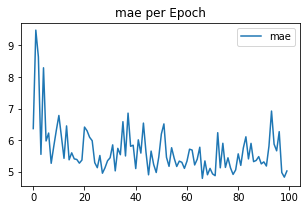

In [52]:
# Plot
fig, ax = plt.subplots(1, figsize = (5, 3))

# Graph training process
plot(ax, avg_mae_hisotry, 'mae')
plt.show()